In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import os
import torch
import torch.utils.data

In [3]:
import torchvision
from torch.utils.tensorboard import SummaryWriter
from tqdm.notebook import tqdm

In [4]:
import sys
sys.path.insert(0, r'C:\Users\liuya\Downloads\3d_printing_research\Sample_1Dr_01\Sample_1Dr_01')

### read images

In [5]:
path = r'C:\Users\liuya\Downloads\3d_printing_research\Sample_1Dr_01\Sample_1Dr_01'
image_list = os.listdir(path)

full_path = os.path.join(path, image_list[350])
img = Image.open(full_path).convert('RGB')
img_array = np.asarray(img)

In [6]:
img_array.shape

(674, 1000, 3)

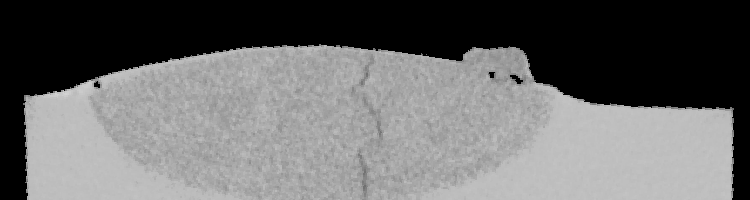

In [7]:
## cut the image
Image.fromarray(img_array[0:200,100:850], 'RGB')

In [8]:
print(len(image_list))
img_f = []
for i in [100,350,500,1000,1500,2000,2500,3000,3500,4000]:
    full_path = os.path.join(path, image_list[i])
    img = Image.open(full_path).convert('RGB')
    img_array = np.asarray(img)
    img_ = Image.fromarray(img_array[0:250,120:850], 'RGB')
    img_f.append(img_)

4046


### clip image, restore

In [68]:
from tqdm.notebook import tqdm

In [77]:
for i in tqdm(image_list):
    full_path = os.path.join(path, i)
    img = Image.open(full_path).convert('RGB')
    img_array = np.asarray(img)
    img_ = Image.fromarray(img_array[0:250,120:850], 'RGB')
    img_.save('clipped_samples/' + i)

  0%|          | 0/4046 [00:00<?, ?it/s]

### method 1: adaptive threshold

In [9]:
import cv2 as cv

In [10]:
np.unique(np.asarray(img_f[2]))

array([  0, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211],
      dtype=uint8)

In [11]:
## th2 = cv.adaptiveThreshold(np.asarray(img_f[0])[:,:,0],255,cv.ADAPTIVE_THRESH_MEAN_C , cv.THRESH_BINARY,11,2)

In [12]:
## Image.fromarray(th2)

### threshold with Otsu

In [21]:
img = cv.cvtColor(np.asarray(img_f[1]), cv.COLOR_BGR2GRAY)

In [14]:
ret, thresh1 = cv.threshold(img, 255, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) 

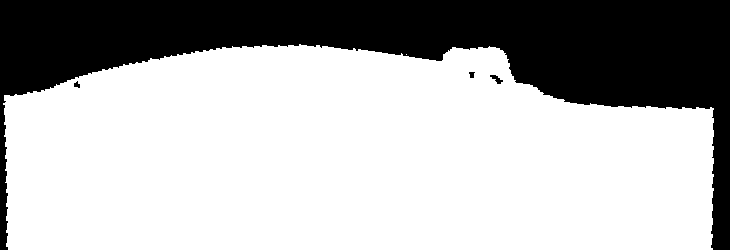

In [15]:
Image.fromarray(thresh1)

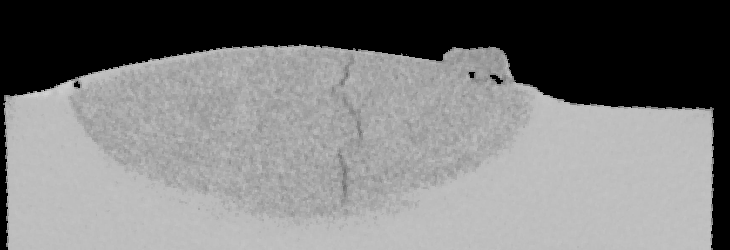

In [16]:
img_f[1]

In [18]:
thresh1.shape

(250, 730)

### clip2, restore2

In [25]:
for i in tqdm(image_list):
    full_path = os.path.join(path, i)
    img = Image.open(full_path).convert('RGB')
    img_array = np.asarray(img)
    img_ = Image.fromarray(img_array[0:250,120:850], 'RGB')
    img_ = cv.cvtColor(np.asarray(img_), cv.COLOR_BGR2GRAY)
    ret, thresh1 = cv.threshold(img_, 255, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) 
    Image.fromarray(thresh1).save('clipped_samples_otsu/' + i)

  0%|          | 0/4046 [00:00<?, ?it/s]